# 🏗️ **Building Sequential Neural Networks across Frameworks**

Just compared how TensorFlow, PyTorch, and JAX/Flax implement the SAME sequential architecture. The differences reveal their design philosophies:

🔹 Keras: "Make it easy" - maximum abstraction  
🔹 PyTorch: "Make it clear" - explicit layers  
🔹 JAX/Flax: "Make it functional" - pure transformations

In [80]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing as fc

The data to be used for training is going to be the California housing dataset from sklearn.datasets api. But this notebook focuses on building the architecture and looking at the various design differences that comes with all three Deep Learning Frameworks.

In [37]:
df = fc(as_frame =True)

In [56]:
x = pd.DataFrame(df.data)

In [57]:
y = pd.DataFrame(df.target)

In [40]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# **Tensorflow and keras model**

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu'),    # 🎯 "Tell me what, not how"
    Dense(32, activation='relu'),    # 🎯 Activation baked in - no separate layers
    Dense(1)                         # 🎯 Clean output layer, no activation needed
])


In [77]:
model.build(input_shape =(None,x.shape[1],)) # initializes weights and biases.


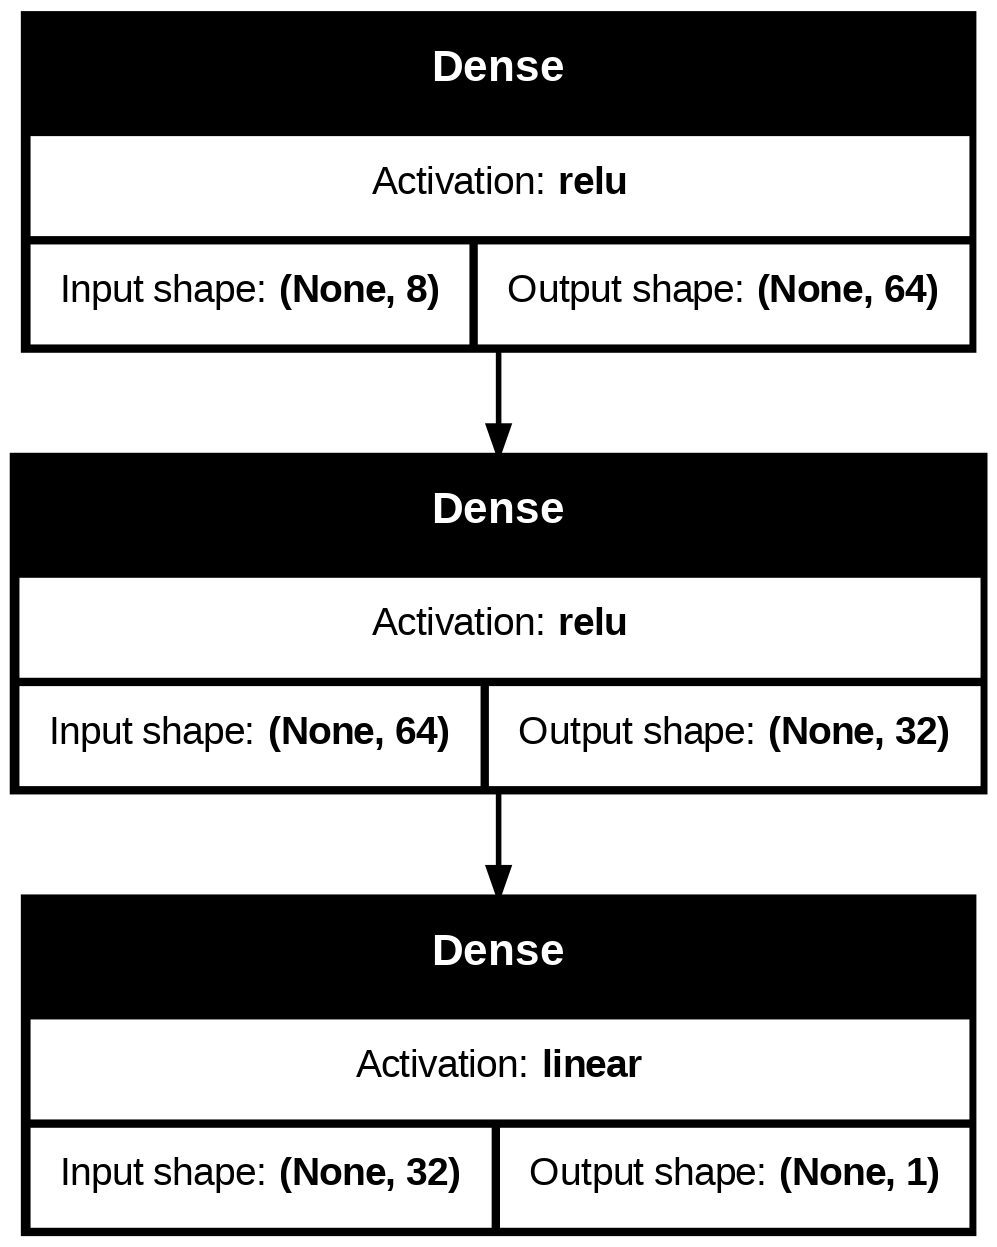

In [78]:
from tensorflow.keras.utils import plot_model

# Create the visualization
plot_model(
    model,
    to_file='model_plot.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # TB = top to bottom, LR = left to right
    dpi=96,
    show_layer_activations=True
)

# Or display directly in notebook
plot_model(model, show_shapes=True, show_layer_activations=True)

# **Pytorch**

In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as f
model_pytorch = nn.Sequential(
    nn.Linear(x.shape[1], 64),  # 🎯 "Show me the math" - explicit input/output sizes
    nn.ReLU(),                  # 🎯 Activation as separate citizen, not parameter
    nn.Linear(64, 32),          # 🎯 Manual dimension tracking - you're the architect
    nn.ReLU(),                  # 🎯 Clear computational graph boundaries
    nn.Linear(32, 1)            # 🎯 No magic - you see every matrix multiplication
)

# Architectural Insights:
"What you see is what you get" - No hidden dimension inference

"Mathematical transparency" - You explicitly define every weight matrix shape

"Composition over configuration" - Build complex networks from simple, explicit layers

"Debugging-friendly" - Easy to trace exactly where dimensions change

# **Flax building**

In [93]:
import jax
import jax.numpy as jnp
from flax import linen as nn
import optax
class Sequential(nn.Module):
    layers: list  # 🎯 Configuration as data - dataclass philosophy

    @nn.compact  # 🎯 "Magic with permission" - explicit decorator for FP magic
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)  # 🎯 Function composition as iteration
        return x

layers = [
    nn.Dense(64),  # 🎯 Blueprint, not instantiated layer
    nn.relu,       # 🎯 Function reference, not lambda - pure FP
    nn.Dense(32),
    nn.relu,
    nn.Dense(1)    # 🎯 Lazy initialization - no input size anxiety
]
model = Sequential(layers)  # 🎯 Configuration separate from execution

In [94]:
x_jax = jnp.array(x.values)
y_jax = jnp.array(y.values)


In [95]:
params = model.init(jax.random.PRNGKey(42),x_jax)

# Architectural Insights:
"Functional composition" - Neural networks as pure function pipelines.

"Lazy evaluation" - Layers materialize during init(), not construction.

"Explicit state" - Parameters are external, not hidden in objects.

"Pythonic FP" - Leverages Python features for functional patterns#.